In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('Real estate.csv')

In [4]:
inputData = ""
outputData = ""

def initialiseData():
    global outputData
    global inputData
    outputData = df.iloc[:,7]
    inputData = df.iloc[:,1:7]

def meanData(inputData):
    return np.mean(inputData)

def sdData(inputData):
    return np.std(inputData)

initialiseData()

In [5]:
numColumns = inputData.shape[1]
startingWeight = np.zeros(numColumns+1)

In [6]:
def normaliseData(inputData):
    meanInput = meanData(inputData)
    stdInput = sdData(inputData)
    return ((inputData-meanInput)/stdInput)

def plotData(plt):
    plt.xlabel('No. of Iterations')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Iterations in case of Ridge Regularisation')
    plt.legend()
    plt.show()
    

In [7]:

def weightFinder(inputData,outputData,bias,penalty,learningRate,startingWeight):
    numRows = inputData.shape[0]
    currValue = inputData.dot(startingWeight) + bias
    deltaWeight = (2*(inputData.T).dot(currValue-outputData) + (2*penalty*startingWeight))/numRows
    deltaBias = 2*np.sum(currValue-outputData)/numRows
    startingWeight = startingWeight - learningRate*deltaWeight
    
    bias = bias - learningRate*deltaBias
    return startingWeight,bias


def gradientDescent(iterations,learningRate,startingWeight,inputData,outputData,numColumns,xCor,yCor,testInput,testOutput,rowsPerFold,trainOutputStd,trainOutputMean,penalty,bias):
    # insertCol(inputData)
    numRows = inputData.shape[0]
    i =0 
    while i<iterations:
        ans = weightFinder(inputData,outputData,bias,penalty,learningRate,startingWeight)
        startingWeight = ans[0]
        bias = ans[1]
        # print(startingWeight)
        valY = loss(rowsPerFold,startingWeight,testInput,trainOutputStd,trainOutputMean,testOutput,bias)
        xCor.append(i+1)
        yCor.append(valY)
        i = i+1
    return startingWeight

def loss(rowsPerFold,newWeight,testInput,trainOutputStd,trainOutputMean,testOutput,bias):
        currLoss=0
        j=0
        while j< rowsPerFold:
            predictedNormalised = bias + np.dot(testInput.iloc[j],newWeight)
            predicted = predictedNormalised*trainOutputStd+trainOutputMean
            currLoss += (predicted-testOutput.iloc[j])**2
            j = j+1
        currLoss = (currLoss/rowsPerFold)
        currLoss = np.sqrt(currLoss)
        return currLoss
    
    

In [8]:
def kFold(k,iterations,learningRate,startingWeight,penalty):
    numColumns = inputData.shape[1]
    totalRows = inputData.shape[0]
    rowsPerFold = int(totalRows/k)
    averageLoss = 0
    i=0
    while i<k:
        xCor = []
        yCor = []
        bias = 0
        start = i*rowsPerFold
        end = start+rowsPerFold
        testInput = inputData[start:end]
        testOutput = outputData[start:end]
        trainInput = inputData.drop(inputData.index[start:end])
        trainOutput = outputData.drop(outputData.index[start:end])
        trainInputMean = meanData(trainInput)
        trainInputStd = sdData(trainInput)
        trainOutputMean = meanData(trainOutput)
        trainOutputStd = sdData(trainOutput)
        trainInput = normaliseData(trainInput)
        trainOutput = normaliseData(trainOutput)
        testInput = (testInput-trainInputMean)/trainInputStd
        
        startingWeight = np.zeros(numColumns)
        startingWeight = gradientDescent(iterations,learningRate,startingWeight,trainInput,trainOutput,numColumns,xCor,yCor,testInput,testOutput,rowsPerFold,trainOutputStd,trainOutputMean,penalty,bias)

        averageLoss += loss(rowsPerFold,startingWeight,testInput,trainOutputStd,trainOutputMean,testOutput,bias)
        RMSELabel = "The K value is"+str((i+1))
        # print("yCor")
        # print(yCor)
        plt.plot(xCor, yCor, label = RMSELabel)
        i = i+1
    plotData(plt)
    
    return averageLoss/k




In [9]:
def runGD(k,learningRate,iterations,penalty):
    print("Learning Rate: ",learningRate," Iterations: ",iterations," k: ",k)
    averageLoss = kFold(k,iterations,learningRate,startingWeight.copy(),penalty)
    print("Average Loss: ",averageLoss)

Learning Rate:  0.0005  Iterations:  500  k:  4


c:\Users\Vibhor\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


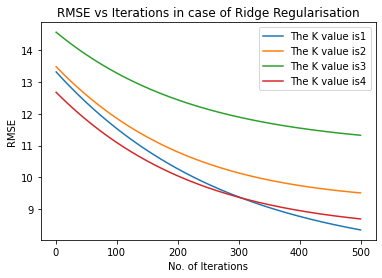

Average Loss:  9.468179472017612


In [10]:
runGD(4,0.0005,500,1)